<a href="https://colab.research.google.com/github/MarziehFarshid/learn1/blob/main/Learn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(n=50, noise=10.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

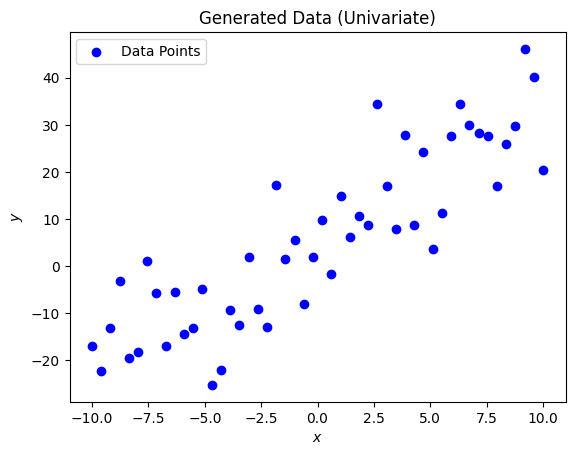

In [3]:
X, y = generate_data(n=50, noise=10.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [4]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")


Parameters (w): 
w_1 = 2.71, w_0 = 5.75


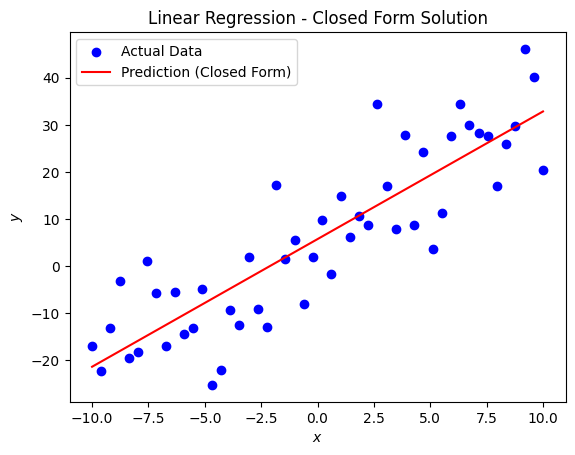

In [5]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [6]:
def J_convex(w):
    return w[0]**2 + 2 * w[1]**2

def grad_J_convex(w):
    return np.array([2 * w[0], 4 * w[1]])

In [7]:
def gradient_descent(grad, w_init, learning_rate=0.1, n_steps=20):
    w = np.array(w_init)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        w = w - learning_rate * grad_w
        path.append(w.copy())

    return np.array(path)

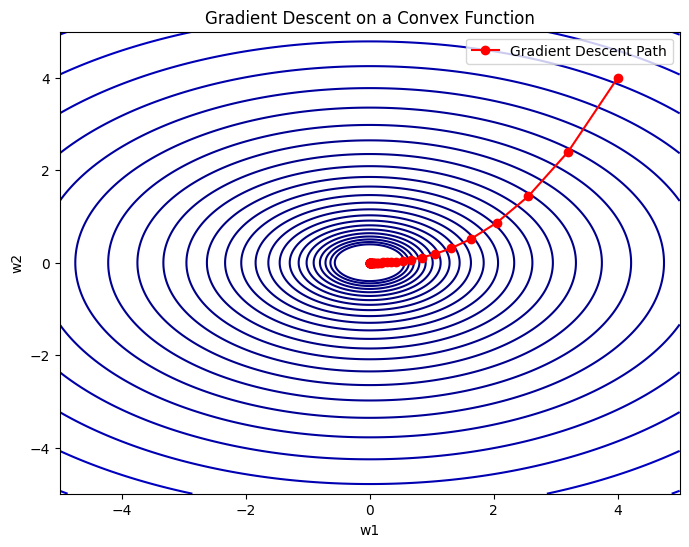

In [8]:
w_init = [4, 4]
path_convex = gradient_descent(grad_J_convex, w_init, learning_rate=0.1, n_steps=50)

w1_vals = np.linspace(-5, 5, 400)
w2_vals = np.linspace(-5, 5, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
J_vals = J_convex([W1, W2])

plt.figure(figsize=(8, 6))
contour_levels = np.logspace(-0.5, 3, 35)
plt.contour(W1, W2, J_vals, levels=contour_levels, cmap="jet")
path_x, path_y = path_convex[:, 0], path_convex[:, 1]
plt.plot(path_x, path_y, marker='o', color='red', label='Gradient Descent Path')
plt.title("Gradient Descent on a Convex Function")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.show()